# Plots synthetic data

In [1]:
import pandas as pd
import numpy as np
from functools import partial
from os.path import exists
import multiprocess
import scipy.sparse
import matplotlib.pyplot as plt
from p_tqdm import p_map
from scipy.stats import gaussian_kde
from scipy.integrate import quad
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

In [2]:
# Plot heatmap of ESS
# regular ESS
ESS_cESFW = pd.read_csv("final_ESSs_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
ESS_cESFW_binarised = pd.read_csv("final_ESSs_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
#bIFW
ESS_bIFW = pd.read_csv("final_binary_IFW_ESS_synthetic.csv",header=0,index_col=0)
#cIFW
ESS_cIFW = pd.read_csv("final_synthetic_continuous_ESS.csv",header=0,index_col=0)




In [3]:
ESS_cESFW = np.absolute(ESS_cESFW.to_numpy())
np.fill_diagonal(ESS_cESFW, 1)
ESS_cESFW_binarised = np.absolute(ESS_cESFW_binarised.to_numpy())
np.fill_diagonal(ESS_cESFW_binarised, 1)
ESS_bIFW = ESS_bIFW.to_numpy()
np.fill_diagonal(ESS_bIFW, 1)
ESS_cIFW = ESS_cIFW.to_numpy()
np.fill_diagonal(ESS_cIFW, 1)

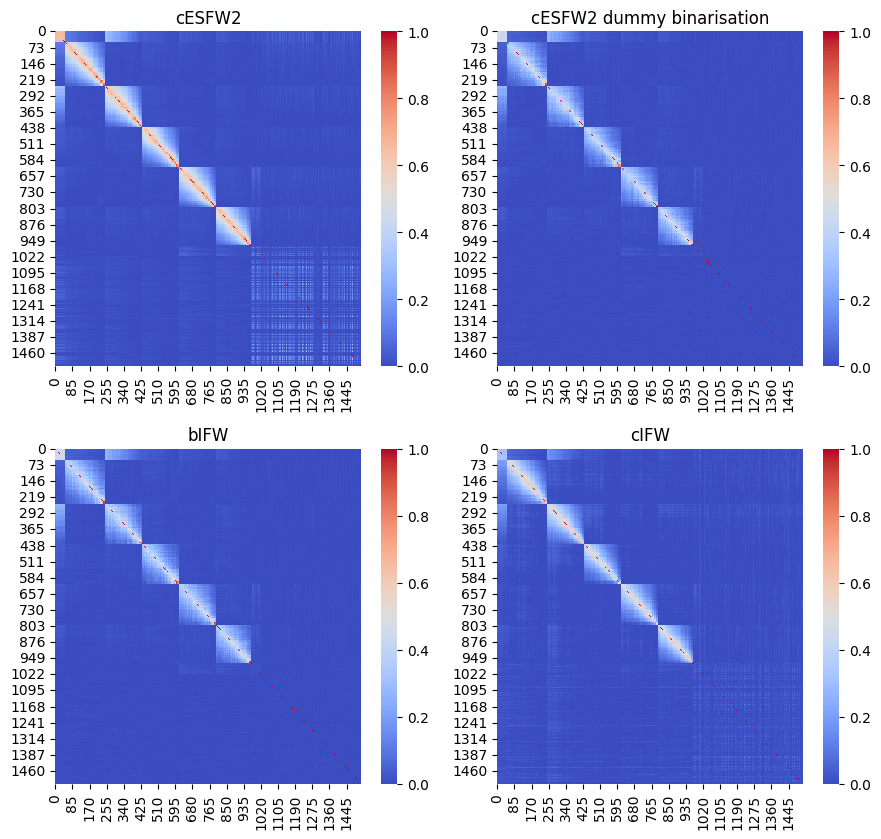

In [4]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(9, 8.5))

sns.heatmap(ESS_cESFW, cmap="coolwarm", ax=axes[0,0])
axes[0,0].set_title(f'cESFW2')

sns.heatmap(ESS_cESFW_binarised, cmap="coolwarm", ax=axes[0,1])
axes[0,1].set_title('cESFW2 dummy binarisation')

sns.heatmap(ESS_bIFW, cmap="coolwarm", ax=axes[1,0])
axes[1,0].set_title('bIFW')

sns.heatmap(ESS_cIFW, cmap="coolwarm", ax=axes[1,1])
axes[1,1].set_title('cIFW')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

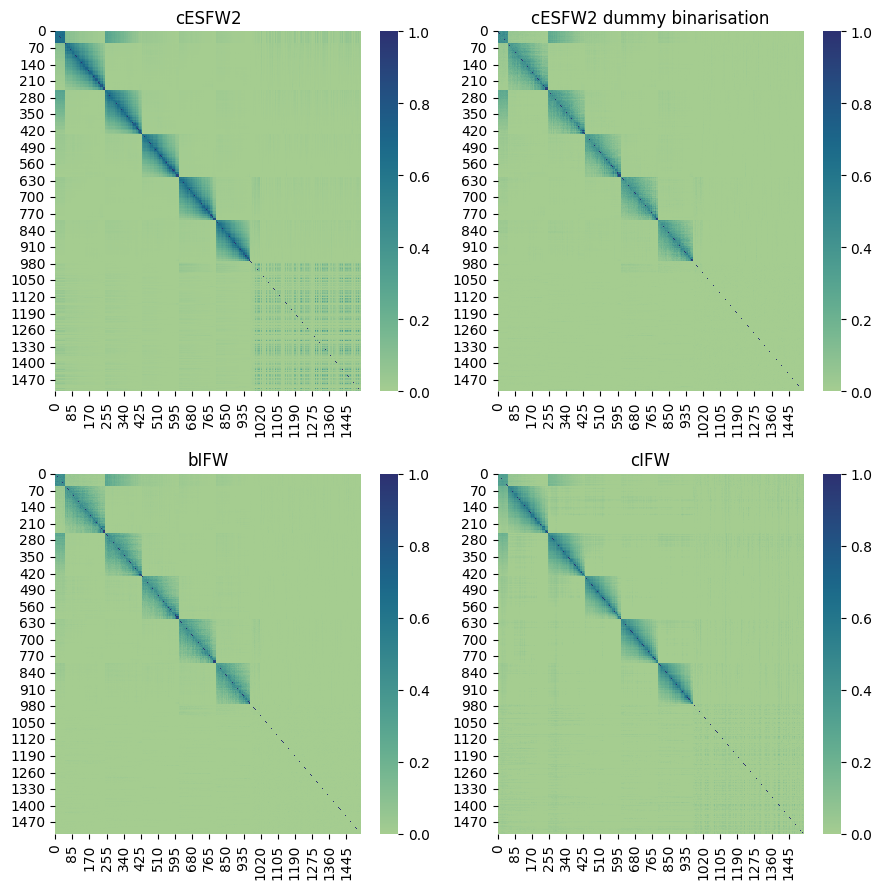

In [7]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

sns.heatmap(np.absolute(ESS_cESFW), ax=axes[0,0], cmap='crest')
axes[0,0].set_title(f'cESFW2')

sns.heatmap(np.absolute(ESS_cESFW_binarised), ax=axes[0,1], cmap='crest')
axes[0,1].set_title('cESFW2 dummy binarisation')

sns.heatmap(ESS_bIFW, ax=axes[1,0], cmap='crest')
axes[1,0].set_title('bIFW')

sns.heatmap(ESS_cIFW, ax=axes[1,1], cmap='crest')
axes[1,1].set_title('cIFW')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

plot entropy

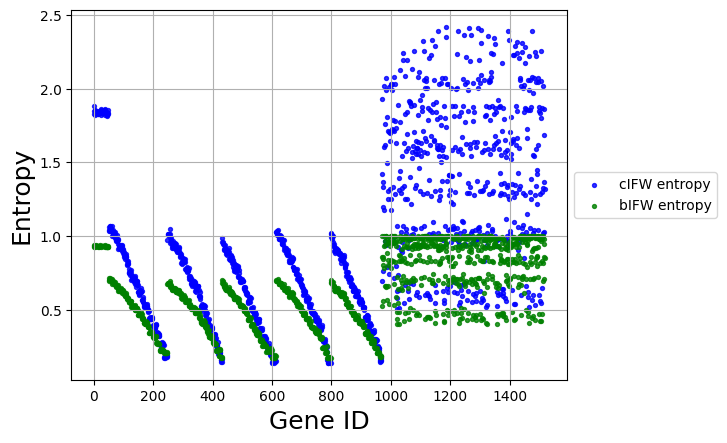

In [ ]:
H_cIFW = np.array(pd.read_csv("synthetic_entropy_newfunction.csv",header=0,index_col=0)).flatten()
#H_bIFW = np.array(pd.read_csv('final_binary_IFW_H_synthetic.csv',header=0,index_col=0)).flatten()
H_bIFW = pd.read_csv('final_binary_IFW_H_synthetic.csv',header=0,index_col=0)

H_bIFW = np.diag(H_bIFW.values)
#CEs = np.array(pd.read_csv("maxCE_new_cESFW_synthetic.csv",header=0,index_col=0)).flatten()


plt.scatter(np.arange(0,1519), H_cIFW, s = 8, alpha = 0.8, c='blue', label=r'cIFW entropy')
plt.scatter(np.arange(0,1519), H_bIFW, s = 8, alpha = 0.8, c='green', label=r'bIFW entropy')
#plt.scatter(np.arange(0,1519), CEs, s = 8, alpha = 0.8, c='grey', label=r'cESFW2 CE')


plt.xlabel('Gene ID', fontsize = 18)
plt.ylabel('Entropy', fontsize = 18)
#plt.title(r"$\chi^2$ statistic (hybrid) and ESS pairwise comparisons", fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

## Now heatmap of p-values

In [ ]:
# Plot heatmap of ESS
# regular ESS
EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
EP_cESFW_binarised = pd.read_csv("final_EP_new_cESFW_synthetic_dummy.csv",header=0,index_col=0)
#bIFW
fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)


In [ ]:
# mask stuff try
#transform p-values
Absolute_ESSs = np.array(np.absolute(ESS_bIFW))
EP = np.absolute(chip_bIFW)
#np.fill_diagonal(EP, 0.5)
#np.fill_diagonal(ESSs, 0)
cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
EP[EP>cutoff] = -np.log(EP)
#EP[np.where(EP<cutoff)] = 0
EP[EP < cutoff] = 0
EP = np.array(EP)
Mask_Inds = np.where((EP <= 0.05/(1519*1519)))
ESSs_Graph = Absolute_ESSs.copy()
ESSs_Graph[Mask_Inds] = 0
EPs_Graph = EP.copy()
EPs_Graph[Mask_Inds] = 0

In [ ]:
np.where(np.sum(EPs_Graph > 0,axis=0) > 10)[0]

array([   0,    1,    2, ..., 1516, 1517, 1518])

In [ ]:
EPs_Graph

array([[5.96679921e+02, 3.03083188e+02, 2.85799895e+02, ...,
        1.31181587e-01, 3.72637888e+00, 6.72825315e+00],
       [3.03083188e+02, 5.96679921e+02, 3.07996094e+02, ...,
        3.56999617e-03, 2.34507807e+00, 4.35185894e+00],
       [2.85799895e+02, 3.07996094e+02, 5.96679921e+02, ...,
        2.43416262e-02, 4.60332621e+00, 4.99385816e+00],
       ...,
       [1.31181587e-01, 3.56999617e-03, 2.43416262e-02, ...,
        5.96679921e+02, 7.45365044e-01, 4.00179422e+00],
       [3.72637888e+00, 2.34507807e+00, 4.60332621e+00, ...,
        7.45365044e-01, 5.96679921e+02, 8.59909086e-01],
       [6.72825315e+00, 4.35185894e+00, 4.99385816e+00, ...,
        4.00179422e+00, 8.59909086e-01, 5.96679921e+02]])

In [ ]:
fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)

cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
chip_bIFW[chip_bIFW > cutoff] = -np.log(chip_bIFW)
#EP[np.where(EP<cutoff)] = 0
chip_bIFW[chip_bIFW < cutoff] = 0

fetp_bIFW[fetp_bIFW > cutoff] = -np.log(fetp_bIFW)
#EP[np.where(EP<cutoff)] = 0
fetp_bIFW[fetp_bIFW < cutoff] = 0



/project/home23/sg2023/Desktop/SBI/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


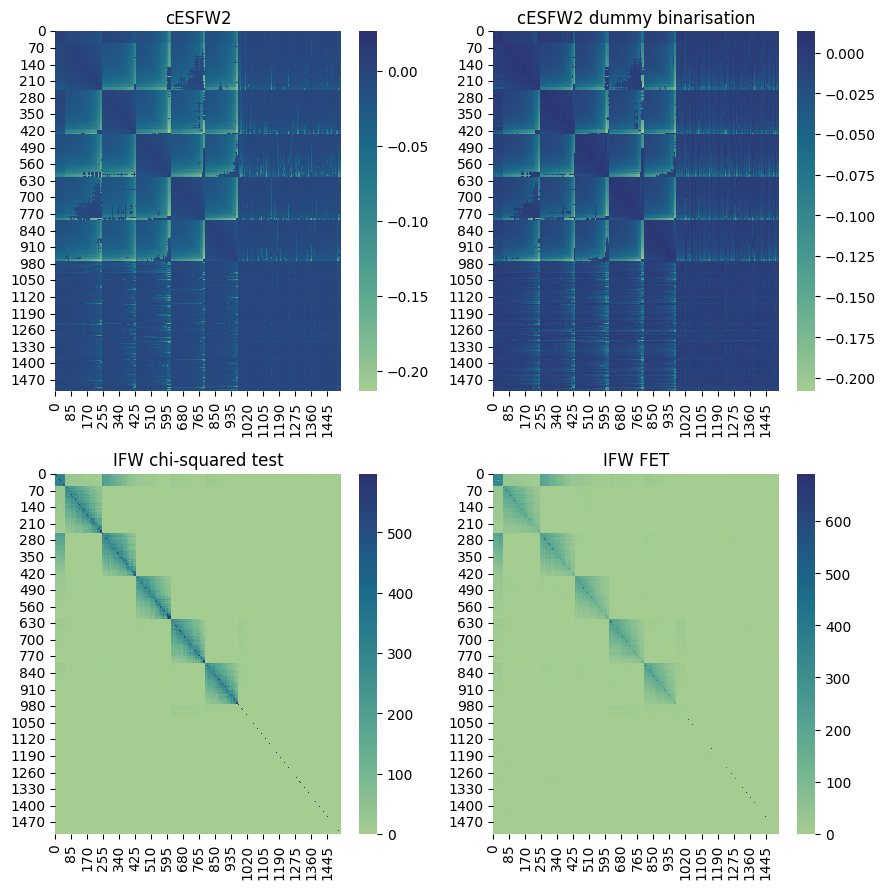

In [ ]:

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

sns.heatmap(EP_cESFW.to_numpy(), ax=axes[0,0], cmap='crest')
axes[0,0].set_title(f'cESFW2')

sns.heatmap(EP_cESFW_binarised.to_numpy(), ax=axes[0,1], cmap='crest')
axes[0,1].set_title('cESFW2 dummy binarisation')

sns.heatmap(chip_bIFW.to_numpy(), ax=axes[1,0], cmap='crest')
axes[1,0].set_title('IFW chi-squared test')

sns.heatmap(fetp_bIFW.to_numpy(), ax=axes[1,1], cmap='crest')
axes[1,1].set_title('IFW FET')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/project/home23/sg2023/Desktop/SBI/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


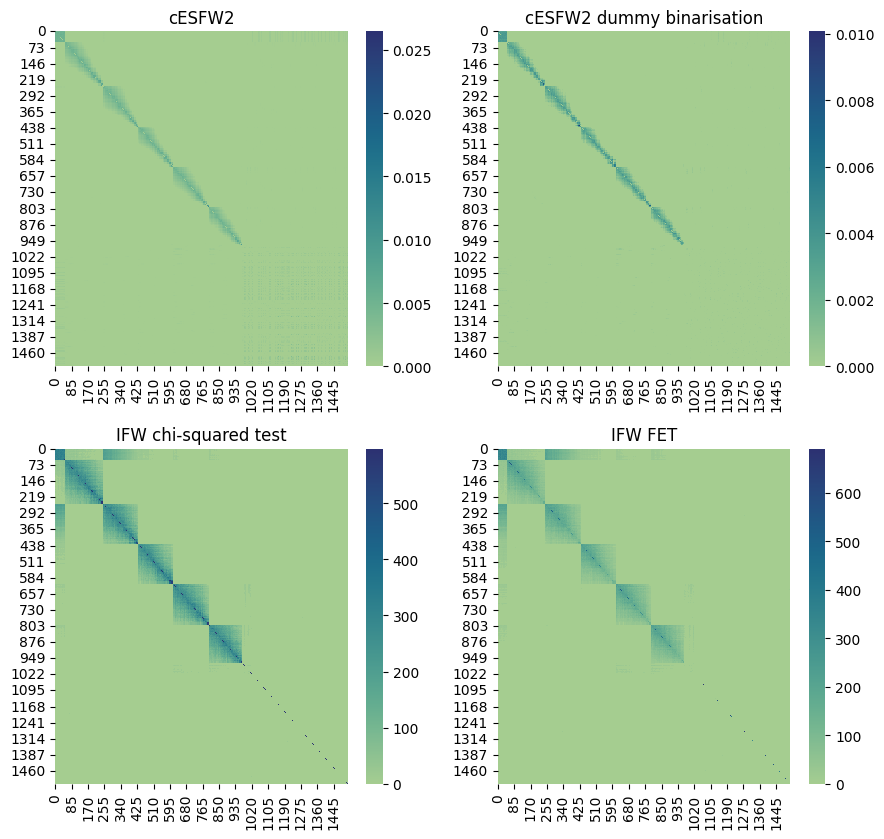

In [ ]:
# now mask
fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)

cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
chip_bIFW[chip_bIFW > cutoff] = -np.log(chip_bIFW)
#EP[np.where(EP<cutoff)] = 0
chip_bIFW[chip_bIFW < cutoff] = 0

fetp_bIFW[fetp_bIFW > cutoff] = -np.log(fetp_bIFW)
#EP[np.where(EP<cutoff)] = 0
fetp_bIFW[fetp_bIFW < cutoff] = 0
# pvals
threshold = -np.log(0.05/(1519*1519))

chip_bIFW[chip_bIFW < threshold] = 0
fetp_bIFW[fetp_bIFW < threshold] = 0

# regular ESS
EP_threshold = 0
EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
EP_cESFW_binarised = pd.read_csv("final_EP_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
EP_cESFW[EP_cESFW < EP_threshold] = 0
EP_cESFW_binarised[EP_cESFW_binarised < EP_threshold] = 0


# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(9, 8.5))

sns.heatmap(EP_cESFW.to_numpy(), ax=axes[0,0], cmap='crest')
axes[0,0].set_title(f'cESFW2')

sns.heatmap(EP_cESFW_binarised.to_numpy(), ax=axes[0,1], cmap='crest')
axes[0,1].set_title('cESFW2 dummy binarisation')

sns.heatmap(chip_bIFW.to_numpy(), ax=axes[1,0], cmap='crest')
axes[1,0].set_title('IFW chi-squared test')

sns.heatmap(fetp_bIFW.to_numpy(), ax=axes[1,1], cmap='crest')
axes[1,1].set_title('IFW FET')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/project/home23/sg2023/Desktop/SBI/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


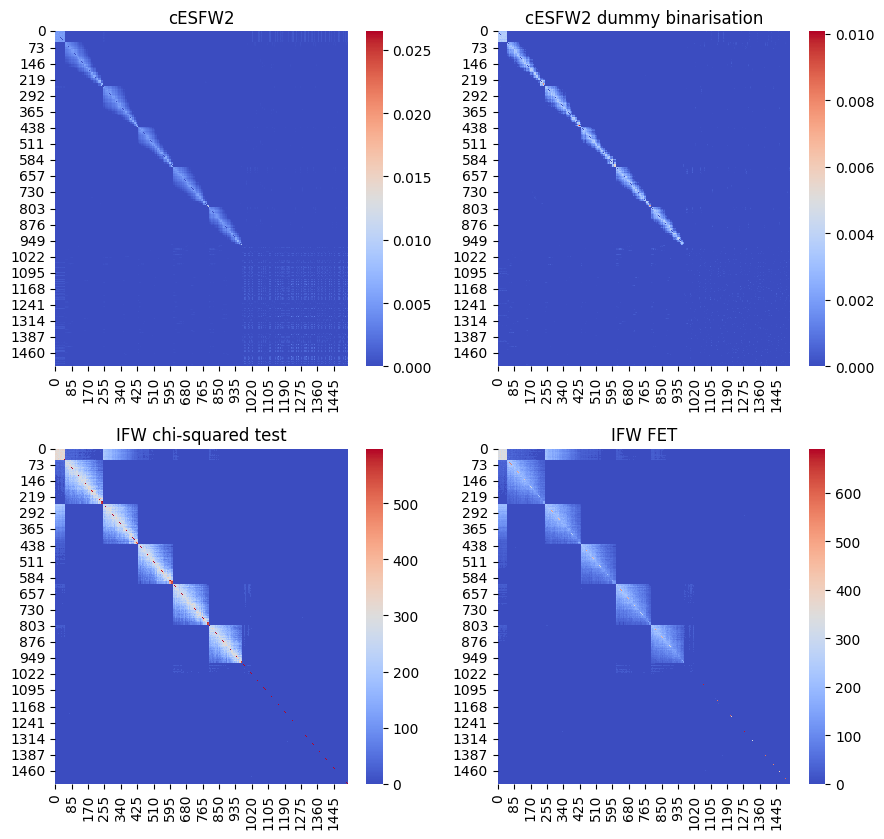

In [ ]:
# now mask
fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)

cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
chip_bIFW[chip_bIFW > cutoff] = -np.log(chip_bIFW)
#EP[np.where(EP<cutoff)] = 0
chip_bIFW[chip_bIFW < cutoff] = 0

fetp_bIFW[fetp_bIFW > cutoff] = -np.log(fetp_bIFW)
#EP[np.where(EP<cutoff)] = 0
fetp_bIFW[fetp_bIFW < cutoff] = 0
# pvals
threshold = -np.log(0.05/(1519*1519))

chip_bIFW[chip_bIFW < threshold] = 0
fetp_bIFW[fetp_bIFW < threshold] = 0

# regular ESS
EP_threshold = 0
EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
EP_cESFW_binarised = pd.read_csv("final_EP_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
EP_cESFW[EP_cESFW < EP_threshold] = 0
EP_cESFW_binarised[EP_cESFW_binarised < EP_threshold] = 0


# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(9, 8.5))

sns.heatmap(EP_cESFW.to_numpy(), ax=axes[0,0], cmap='coolwarm')
axes[0,0].set_title(f'cESFW2')

sns.heatmap(EP_cESFW_binarised.to_numpy(), ax=axes[0,1], cmap='coolwarm')
axes[0,1].set_title('cESFW2 dummy binarisation')

sns.heatmap(chip_bIFW.to_numpy(), ax=axes[1,0], cmap='coolwarm')
axes[1,0].set_title('IFW chi-squared test')

sns.heatmap(fetp_bIFW.to_numpy(), ax=axes[1,1], cmap='coolwarm')
axes[1,1].set_title('IFW FET')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/project/home23/sg2023/Desktop/SBI/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


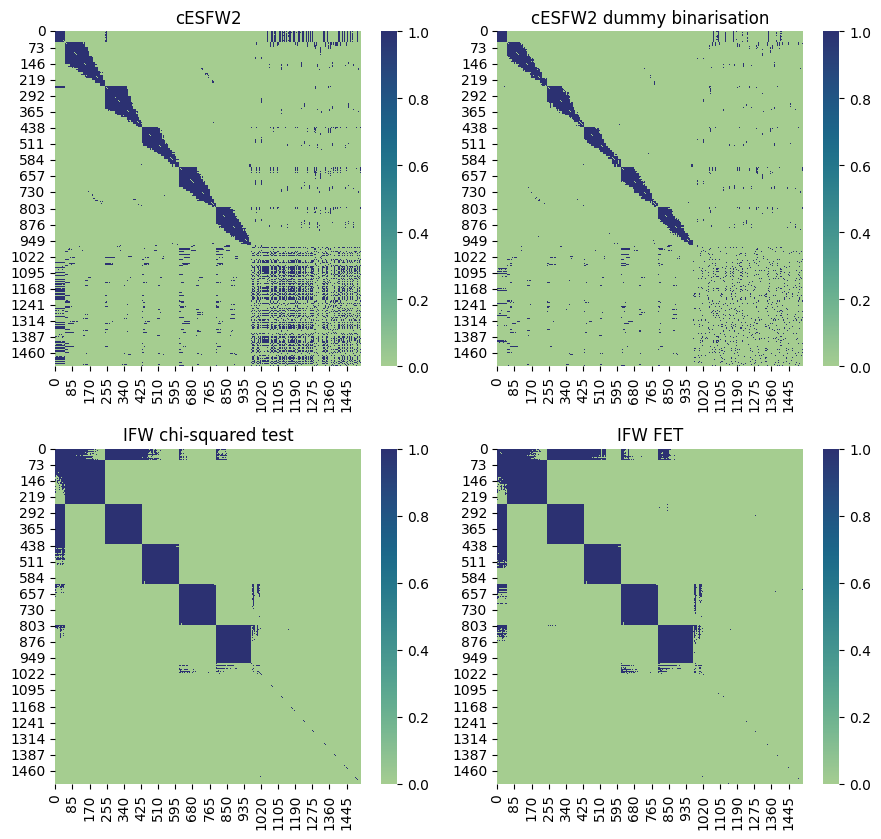

In [ ]:
# now mask
fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)

cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
chip_bIFW[chip_bIFW > cutoff] = -np.log(chip_bIFW)
#EP[np.where(EP<cutoff)] = 0
chip_bIFW[chip_bIFW < cutoff] = 0

fetp_bIFW[fetp_bIFW > cutoff] = -np.log(fetp_bIFW)
#EP[np.where(EP<cutoff)] = 0
fetp_bIFW[fetp_bIFW < cutoff] = 0
# pvals
threshold = -np.log(0.05/(1519*1519))

chip_bIFW[chip_bIFW < threshold] = 0
chip_bIFW[chip_bIFW > threshold] = 1
fetp_bIFW[fetp_bIFW < threshold] = 0
fetp_bIFW[fetp_bIFW > threshold] = 1

# regular ESS
EP_threshold = 0
EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
EP_cESFW_binarised = pd.read_csv("final_EP_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
EP_cESFW[EP_cESFW < EP_threshold] = 0
EP_cESFW[EP_cESFW > EP_threshold] = 1
EP_cESFW_binarised[EP_cESFW_binarised < EP_threshold] = 0
EP_cESFW_binarised[EP_cESFW_binarised > EP_threshold] = 1


# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(9, 8.5))

sns.heatmap(EP_cESFW.to_numpy(), ax=axes[0,0], cmap='crest')
axes[0,0].set_title(f'cESFW2')

sns.heatmap(EP_cESFW_binarised.to_numpy(), ax=axes[0,1], cmap='crest')
axes[0,1].set_title('cESFW2 dummy binarisation')

sns.heatmap(chip_bIFW.to_numpy(), ax=axes[1,0], cmap='crest')
axes[1,0].set_title('IFW chi-squared test')

sns.heatmap(fetp_bIFW.to_numpy(), ax=axes[1,1], cmap='crest')
axes[1,1].set_title('IFW FET')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Scatterplots

In [ ]:
# Plot heatmap of ESS
# regular ESS
ESS_cESFW = pd.read_csv("final_ESSs_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
ESS_cESFW_binarised = pd.read_csv("final_ESSs_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
#bIFW
ESS_bIFW = pd.read_csv("final_binary_IFW_ESS_synthetic.csv",header=0,index_col=0)
#cIFW
ESS_cIFW = pd.read_csv("final_synthetic_continuous_ESS.csv",header=0,index_col=0)

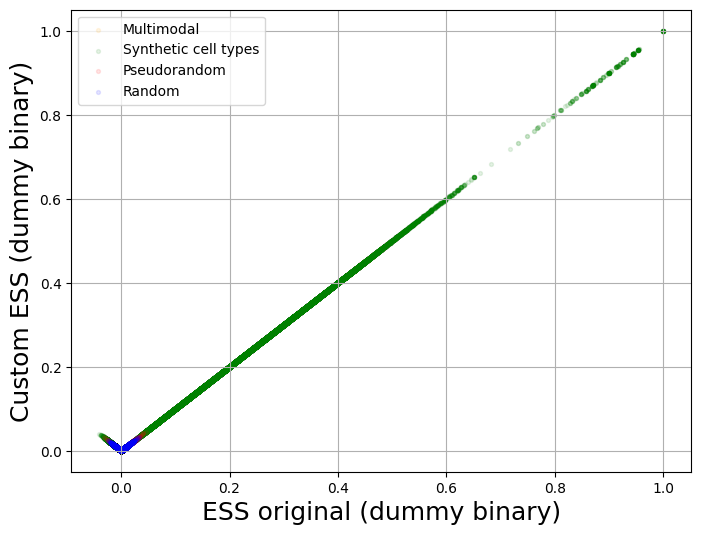

In [ ]:
# Show equivalence between binarised cESFW and bIFW (SAME BINARISATION, 25TH PERCENTILE THRESHOLD)

emptymatrix = np.zeros(1519*1519)
reshaped_empty = emptymatrix.reshape(1519,1519)
emptydf = pd.DataFrame(reshaped_empty)
mask = np.tril(np.ones(emptydf.shape), k=0).astype(bool)
mESS_synthetic = ESS_cESFW_binarised.where(mask)
mESS_custom = ESS_bIFW.where(mask)
np.fill_diagonal(mESS_synthetic.values, np.NaN)
np.fill_diagonal(mESS_custom.values, np.NaN)

sESS_multimodal = mESS_synthetic.iloc[0:50, 0:50]
sESS_multimodal_flat = np.array(sESS_multimodal).flatten()

sESS_ordered = mESS_synthetic.iloc[50:969, 50:969]
sESS_ordered_flat = np.array(sESS_ordered).flatten()

sESS_pseudorandom = mESS_synthetic.iloc[969:1019, 969:1019]
sESS_pseudorandom_flat = np.array(sESS_pseudorandom).flatten()

sESS_random = mESS_synthetic.iloc[1019:1520, 1019:1520]
sESS_random_flat = np.array(sESS_random).flatten()

csESS_multimodal = mESS_custom.iloc[0:50, 0:50]
csESS_multimodal_flat = np.array(csESS_multimodal).flatten()

csESS_ordered = mESS_custom.iloc[50:969, 50:969]
csESS_ordered_flat = np.array(csESS_ordered).flatten()

csESS_pseudorandom = mESS_custom.iloc[969:1019, 969:1019]
csESS_pseudorandom_flat = np.array(csESS_pseudorandom).flatten()

csESS_random = mESS_custom.iloc[1019:1520, 1019:1520]
csESS_random_flat = np.array(csESS_random).flatten()


plt.figure(figsize=(8, 6))
plt.scatter(sESS_multimodal_flat, csESS_multimodal_flat, s = 8, alpha = 0.1, c='orange', label=r'Multimodal')
plt.scatter(sESS_ordered_flat, csESS_ordered_flat, s = 8, alpha = 0.1, c='green', label=r'Synthetic cell types')
plt.scatter(sESS_pseudorandom_flat, csESS_pseudorandom_flat, s = 8, alpha = 0.1, c='red', label=r'Pseudorandom')
plt.scatter(sESS_random_flat, csESS_random_flat, s = 8, alpha = 0.1, c='blue', label=r'Random')

plt.xlabel('ESS original (dummy binary)', fontsize = 18)
plt.ylabel('Custom ESS (dummy binary)', fontsize = 18)
#plt.title(r"$\chi^2$ statistic (hybrid) and ESS pairwise comparisons", fontsize = 18)
plt.legend()
plt.grid(True)
plt.show()

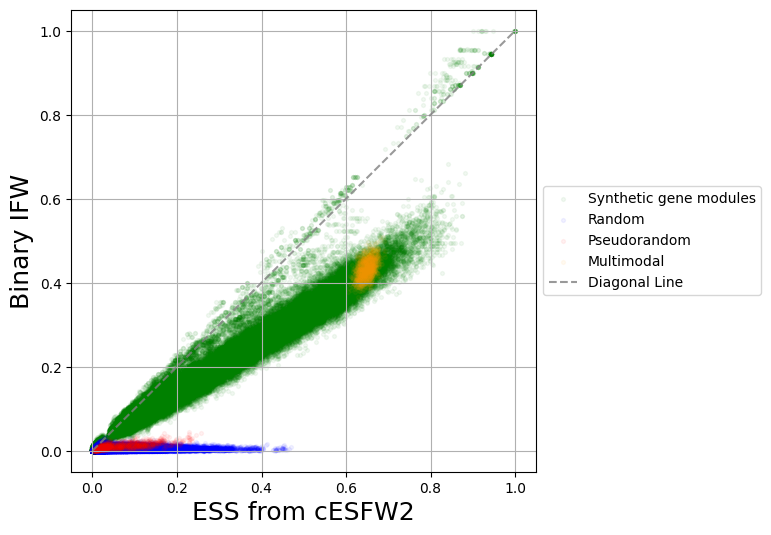

In [ ]:
# Show ESS comparison

emptymatrix = np.zeros(1519*1519)
reshaped_empty = emptymatrix.reshape(1519,1519)
emptydf = pd.DataFrame(reshaped_empty)
mask = np.tril(np.ones(emptydf.shape), k=0).astype(bool)
mESS_synthetic = np.absolute(ESS_cESFW.where(mask))
mESS_custom = ESS_bIFW.where(mask)
np.fill_diagonal(mESS_synthetic.values, np.NaN)
np.fill_diagonal(mESS_custom.values, np.NaN)

sESS_multimodal = mESS_synthetic.iloc[0:50, 0:50]
sESS_multimodal_flat = np.array(sESS_multimodal).flatten()

sESS_ordered = mESS_synthetic.iloc[50:969, 50:969]
sESS_ordered_flat = np.array(sESS_ordered).flatten()

sESS_pseudorandom = mESS_synthetic.iloc[969:1019, 969:1019]
sESS_pseudorandom_flat = np.array(sESS_pseudorandom).flatten()

sESS_random = mESS_synthetic.iloc[1019:1520, 1019:1520]
sESS_random_flat = np.array(sESS_random).flatten()

csESS_multimodal = mESS_custom.iloc[0:50, 0:50]
csESS_multimodal_flat = np.array(csESS_multimodal).flatten()

csESS_ordered = mESS_custom.iloc[50:969, 50:969]
csESS_ordered_flat = np.array(csESS_ordered).flatten()

csESS_pseudorandom = mESS_custom.iloc[969:1019, 969:1019]
csESS_pseudorandom_flat = np.array(csESS_pseudorandom).flatten()

csESS_random = mESS_custom.iloc[1019:1520, 1019:1520]
csESS_random_flat = np.array(csESS_random).flatten()


plt.figure(figsize=(6, 6))
plt.scatter(sESS_ordered_flat, csESS_ordered_flat, s = 8, alpha = 0.05, c='green', label=r'Synthetic gene modules')
plt.scatter(sESS_random_flat, csESS_random_flat, s = 8, alpha = 0.05, c='blue', label=r'Random')
plt.scatter(sESS_pseudorandom_flat, csESS_pseudorandom_flat, s = 8, alpha = 0.05, c='red', label=r'Pseudorandom')
plt.scatter(sESS_multimodal_flat, csESS_multimodal_flat, s = 8, alpha = 0.05, c='orange', label=r'Multimodal')
plt.plot([0,1], [0,1], '--', color='gray', alpha=0.8, label='Diagonal Line')

plt.xlabel('ESS from cESFW2', fontsize = 18)
plt.ylabel('Binary IFW', fontsize = 18)
#plt.title(r"$\chi^2$ statistic (hybrid) and ESS pairwise comparisons", fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

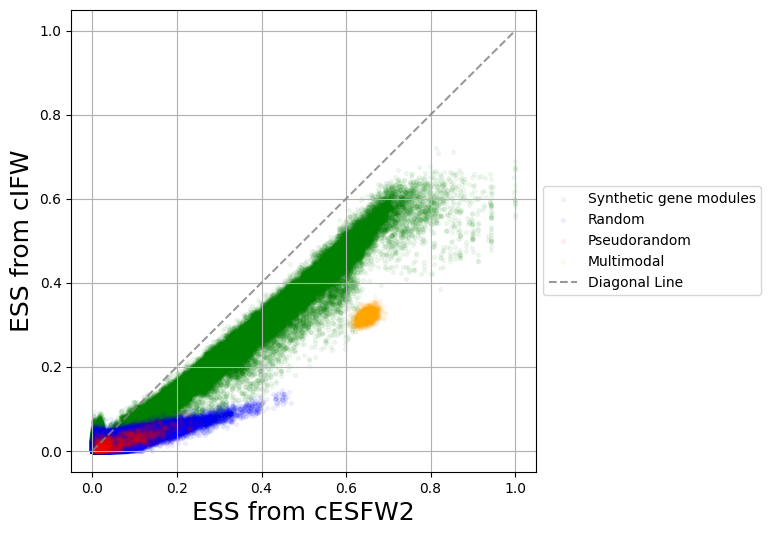

In [ ]:
# Show ESS comparison

emptymatrix = np.zeros(1519*1519)
reshaped_empty = emptymatrix.reshape(1519,1519)
emptydf = pd.DataFrame(reshaped_empty)
mask = np.tril(np.ones(emptydf.shape), k=0).astype(bool)
mESS_synthetic = np.absolute(ESS_cESFW.where(mask))
mESS_custom = ESS_cIFW.where(mask)
np.fill_diagonal(mESS_synthetic.values, np.NaN)
np.fill_diagonal(mESS_custom.values, np.NaN)

sESS_multimodal = mESS_synthetic.iloc[0:50, 0:50]
sESS_multimodal_flat = np.array(sESS_multimodal).flatten()

sESS_ordered = mESS_synthetic.iloc[50:969, 50:969]
sESS_ordered_flat = np.array(sESS_ordered).flatten()

sESS_pseudorandom = mESS_synthetic.iloc[969:1019, 969:1019]
sESS_pseudorandom_flat = np.array(sESS_pseudorandom).flatten()

sESS_random = mESS_synthetic.iloc[1019:1520, 1019:1520]
sESS_random_flat = np.array(sESS_random).flatten()

csESS_multimodal = mESS_custom.iloc[0:50, 0:50]
csESS_multimodal_flat = np.array(csESS_multimodal).flatten()

csESS_ordered = mESS_custom.iloc[50:969, 50:969]
csESS_ordered_flat = np.array(csESS_ordered).flatten()

csESS_pseudorandom = mESS_custom.iloc[969:1019, 969:1019]
csESS_pseudorandom_flat = np.array(csESS_pseudorandom).flatten()

csESS_random = mESS_custom.iloc[1019:1520, 1019:1520]
csESS_random_flat = np.array(csESS_random).flatten()


plt.figure(figsize=(6, 6))
plt.scatter(sESS_ordered_flat, csESS_ordered_flat, s = 8, alpha = 0.05, c='green', label=r'Synthetic gene modules')
plt.scatter(sESS_random_flat, csESS_random_flat, s = 8, alpha = 0.05, c='blue', label=r'Random')
plt.scatter(sESS_pseudorandom_flat, csESS_pseudorandom_flat, s = 8, alpha = 0.05, c='red', label=r'Pseudorandom')
plt.scatter(sESS_multimodal_flat, csESS_multimodal_flat, s = 8, alpha = 0.05, c='orange', label=r'Multimodal')
plt.plot([0,1], [0,1], '--', color='gray', alpha=0.8, label='Diagonal Line')

plt.xlabel('ESS from cESFW2', fontsize = 18)
plt.ylabel('ESS from cIFW', fontsize = 18)
#plt.title(r"$\chi^2$ statistic (hybrid) and ESS pairwise comparisons", fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### MIs vs ESS

In [8]:
# Plot heatmap of ESS
# regular ESS
ESS_cESFW = pd.read_csv("final_ESSs_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
ESS_cESFW_binarised = pd.read_csv("final_ESSs_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
#bIFW
ESS_bIFW = pd.read_csv("final_binary_IFW_ESS_synthetic.csv",header=0,index_col=0)
#cIFW
ESS_cIFW = pd.read_csv("final_synthetic_continuous_ESS.csv",header=0,index_col=0)

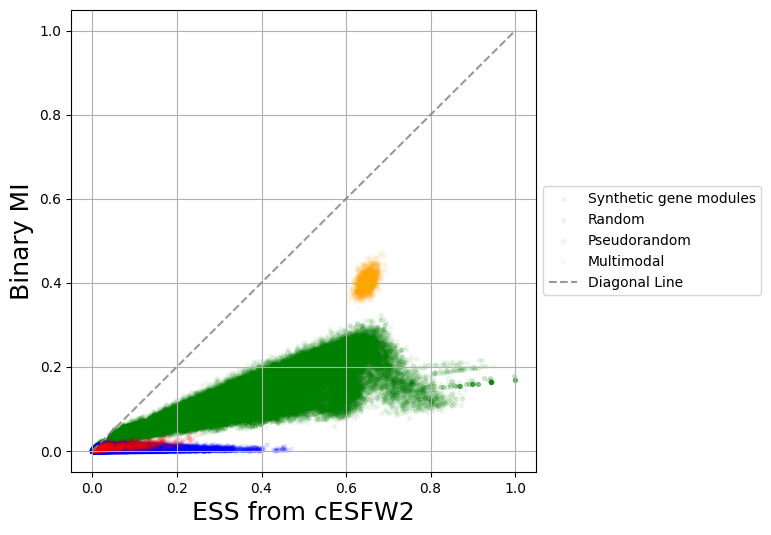

In [9]:
# MIs
bMI = pd.read_csv("final_binary_IFW_MI_synthetic.csv",header=0,index_col=0)
cMI = pd.read_csv("final_synthetic_continuous_MI.csv",header=0,index_col=0)

# load ESS from cESFW
emptymatrix = np.zeros(1519*1519)
reshaped_empty = emptymatrix.reshape(1519,1519)
emptydf = pd.DataFrame(reshaped_empty)
mask = np.tril(np.ones(emptydf.shape), k=0).astype(bool)
mESS_synthetic = np.absolute(ESS_cESFW.where(~mask))
np.fill_diagonal(mESS_synthetic.values, np.NaN)



sESS_multimodal = mESS_synthetic.iloc[0:50, 0:50]
sESS_multimodal_flat = np.array(sESS_multimodal).flatten()

sESS_ordered = mESS_synthetic.iloc[50:969, 50:969]
sESS_ordered_flat = np.array(sESS_ordered).flatten()

sESS_pseudorandom = mESS_synthetic.iloc[969:1019, 969:1019]
sESS_pseudorandom_flat = np.array(sESS_pseudorandom).flatten()

sESS_random = mESS_synthetic.iloc[1019:1520, 1019:1520]
sESS_random_flat = np.array(sESS_random).flatten()

# bMI
np.fill_diagonal(bMI.values, np.NaN)
bMI_multimodal = bMI.iloc[0:50, 0:50]
bMI_multimodal_flat = np.array(bMI_multimodal).flatten()

bMI_ordered = bMI.iloc[50:969, 50:969]
bMI_ordered_flat = np.array(bMI_ordered).flatten()

bMI_pseudorandom = bMI.iloc[969:1019, 969:1019]
bMI_pseudorandom_flat = np.array(bMI_pseudorandom).flatten()

bMI_random = bMI.iloc[1019:1520, 1019:1520]
bMI_random_flat = np.array(bMI_random).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(sESS_ordered_flat, bMI_ordered_flat, s = 8, alpha = 0.05, c='green', label=r'Synthetic gene modules')
plt.scatter(sESS_random_flat, bMI_random_flat, s = 8, alpha = 0.05, c='blue', label=r'Random')
plt.scatter(sESS_pseudorandom_flat, bMI_pseudorandom_flat, s = 8, alpha = 0.05, c='red', label=r'Pseudorandom')
plt.scatter(sESS_multimodal_flat, bMI_multimodal_flat, s = 8, alpha = 0.05, c='orange', label=r'Multimodal')
plt.plot([0,1], [0,1], '--', color='gray', alpha=0.8, label='Diagonal Line')

plt.xlabel('ESS from cESFW2', fontsize = 18)
plt.ylabel('Binary MI', fontsize = 18)
#plt.title(r"$\chi^2$ statistic (hybrid) and ESS pairwise comparisons", fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

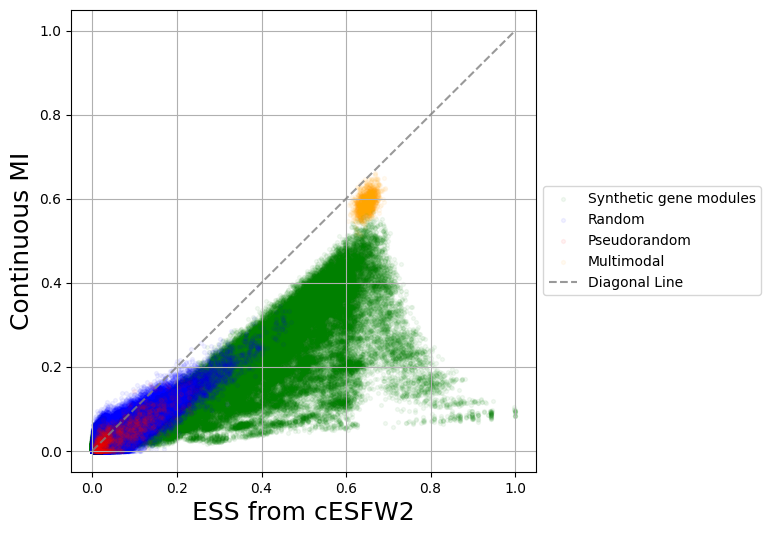

In [10]:
# cMI
np.fill_diagonal(cMI.values, np.NaN)

cMI_multimodal = cMI.iloc[0:50, 0:50]
cMI_multimodal_flat = np.array(cMI_multimodal).flatten()

cMI_ordered = cMI.iloc[50:969, 50:969]
cMI_ordered_flat = np.array(cMI_ordered).flatten()

cMI_pseudorandom = cMI.iloc[969:1019, 969:1019]
cMI_pseudorandom_flat = np.array(cMI_pseudorandom).flatten()

cMI_random = cMI.iloc[1019:1520, 1019:1520]
cMI_random_flat = np.array(cMI_random).flatten()


plt.figure(figsize=(6, 6))
plt.scatter(sESS_ordered_flat, cMI_ordered_flat, s = 8, alpha = 0.05, c='green', label=r'Synthetic gene modules')
plt.scatter(sESS_random_flat, cMI_random_flat, s = 8, alpha = 0.05, c='blue', label=r'Random')
plt.scatter(sESS_pseudorandom_flat, cMI_pseudorandom_flat, s = 8, alpha = 0.05, c='red', label=r'Pseudorandom')
plt.scatter(sESS_multimodal_flat, cMI_multimodal_flat, s = 8, alpha = 0.05, c='orange', label=r'Multimodal')
plt.plot([0,1], [0,1], '--', color='gray', alpha=0.8, label='Diagonal Line')

plt.xlabel('ESS from cESFW2', fontsize = 18)
plt.ylabel('Continuous MI', fontsize = 18)
#plt.title(r"$\chi^2$ statistic (hybrid) and ESS pairwise comparisons", fontsize = 18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

### Scatterplot of significance scores

/project/home23/sg2023/Desktop/SBI/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


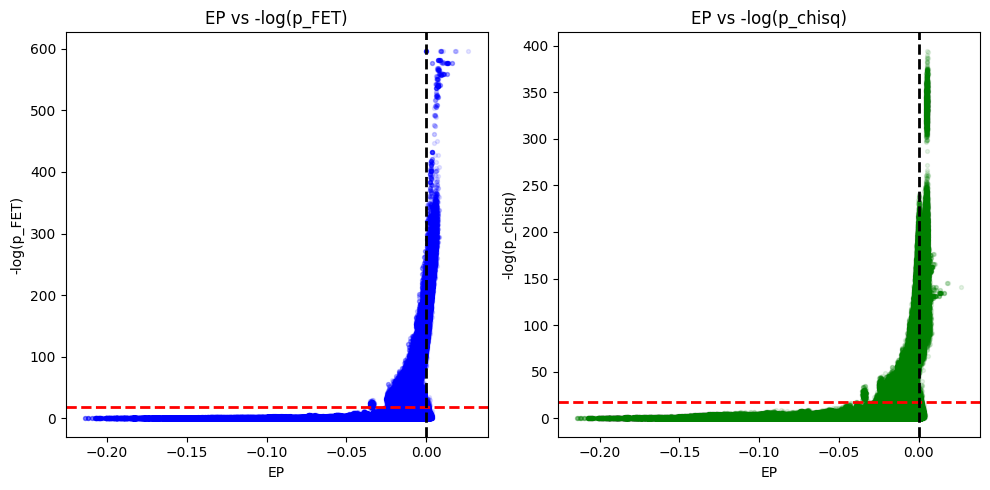

In [30]:
# now mask
fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)

cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
chip_bIFW[chip_bIFW > cutoff] = -np.log(chip_bIFW)
#EP[np.where(EP<cutoff)] = 0
chip_bIFW[chip_bIFW < cutoff] = 0

fetp_bIFW[fetp_bIFW > cutoff] = -np.log(fetp_bIFW)
#EP[np.where(EP<cutoff)] = 0
fetp_bIFW[fetp_bIFW < cutoff] = 0
# pvals
threshold = -np.log(0.05/(1519*1519))

#mask
fetp_bIFW = np.array(fetp_bIFW.where(~mask)).flatten()
chip_bIFW = np.array(chip_bIFW.where(~mask)).flatten()

# regular ESS
EP_threshold = 0
EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
EP_cESFW = np.array(EP_cESFW.where(~mask)).flatten()

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First scatter plot
ax1.scatter(EP_cESFW, chip_bIFW, color='blue', s = 8, alpha = 0.1)
ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax1.set_title('EP vs -log(p_FET)')
ax1.set_xlabel('EP')
ax1.set_ylabel('-log(p_FET)')
#ax1.legend()

# Second scatter plot
ax2.scatter(EP_cESFW, fetp_bIFW, color='green', s = 8, alpha = 0.1)
ax2.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
ax2.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax2.set_title('EP vs -log(p_chisq)')
ax2.set_xlabel('EP')
ax2.set_ylabel('-log(p_chisq)')
#ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

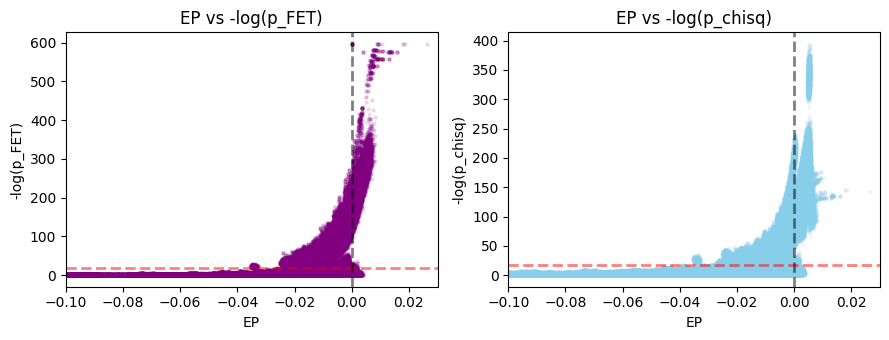

In [121]:
# now mask
fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)
np.fill_diagonal(fetp_bIFW.values, np.NaN)
np.fill_diagonal(chip_bIFW.values, np.NaN)

cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
chip_bIFW[chip_bIFW > cutoff] = -np.log(chip_bIFW)
#EP[np.where(EP<cutoff)] = 0
chip_bIFW[chip_bIFW < cutoff] = 0

fetp_bIFW[fetp_bIFW > cutoff] = -np.log(fetp_bIFW)
#EP[np.where(EP<cutoff)] = 0
fetp_bIFW[fetp_bIFW < cutoff] = 0
# pvals
threshold = -np.log(0.05/(1519*1519))

#mask
fetp_bIFW = np.array(fetp_bIFW).flatten()
chip_bIFW = np.array(chip_bIFW).flatten()

# regular ESS
EP_threshold = 0
EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
np.fill_diagonal(EP_cESFW.values, np.NaN)
EP_cESFW = np.array(EP_cESFW).flatten()

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.5))  # 1 row, 2 columns

# First scatter plot
ax1.scatter(EP_cESFW, chip_bIFW, color='purple', s = 5, alpha = 0.05)
ax1.axhline(y=threshold, color='r', linestyle='--',alpha=0.5, linewidth=2)
ax1.axvline(x=0, color='black', linestyle='--',alpha=0.5, linewidth=2)
ax1.set_title('EP vs -log(p_FET)')
ax1.set_xlabel('EP')
ax1.set_ylabel('-log(p_FET)')
ax1.set_xlim(-0.1,0.03)
#ax1.legend()

# Second scatter plot
ax2.scatter(EP_cESFW, fetp_bIFW, color='skyblue', s = 5, alpha = 0.05)
ax2.axhline(y=threshold, color='r', linestyle='--',alpha=0.5, linewidth=2)
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5, linewidth=2)
ax2.set_title('EP vs -log(p_chisq)')
ax2.set_xlabel('EP')
ax2.set_ylabel('-log(p_chisq)')
ax2.set_xlim(-0.1,0.03)
#ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

# Weights?

In [97]:
# Plot heatmap of ESS
# regular ESS
ESS_cESFW = pd.read_csv("final_ESSs_new_cESFW_synthetic.csv",header=0,index_col=0)
# binarised ESS
ESS_cESFW_binarised = pd.read_csv("final_ESSs_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
#bIFW
ESS_bIFW = pd.read_csv("final_binary_IFW_ESS_synthetic.csv",header=0,index_col=0)
#cIFW
ESS_cIFW = pd.read_csv("final_synthetic_continuous_ESS.csv",header=0,index_col=0)


fetp_bIFW = pd.read_csv("final_fetp_synthetic.csv",header=0,index_col=0)
chip_bIFW = pd.read_csv("final_chip_synthetic.csv",header=0,index_col=0)

cutoff = 1e-300 #This cutoff prevents introducing NaNs
#logged = np.where(EP>cutoff)[0]
chip_bIFW[chip_bIFW > cutoff] = -np.log(chip_bIFW)
#EP[np.where(EP<cutoff)] = 0
chip_bIFW[chip_bIFW < cutoff] = 0

fetp_bIFW[fetp_bIFW > cutoff] = -np.log(fetp_bIFW)
#EP[np.where(EP<cutoff)] = 0
fetp_bIFW[fetp_bIFW < cutoff] = 0


EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
EP_cESFW_binarised = pd.read_csv("final_EP_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
#EP_cESFW[EP_cESFW < EP_threshold] = 0
#EP_cESFW[EP_cESFW > EP_threshold] = 1

/project/home23/sg2023/Desktop/SBI/.conda/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [98]:
# define a simplified function to calculate the weights
#Used_Features = np.arange(1519)
ESS_Threshold = 0
EP_Threshold = 0
pval_threshold = -np.log(0.05/(1519*1519))

def Feature_Weighting_cESFW(ESS_Threshold, EP_Threshold, ESSs, EPs):
    Absolute_ESSs = np.array(np.absolute(ESSs))
    Mask_Inds = np.where((EPs <= EP_Threshold) & (Absolute_ESSs < ESS_Threshold))
    Masked_ESSs = np.array(ESSs).copy() #Absolute_ESSs.copy()
    Masked_ESSs[Mask_Inds] = 0
    Masked_EPs = np.array(EPs).copy()
    Masked_EPs[Mask_Inds] = 0
    ## Feature weighting via weighted node centrality
    Feature_Weights = np.average(Absolute_ESSs,weights=Masked_EPs,axis=0)
    Significant_Genes_Per_Gene = (Masked_EPs > 0).sum(1)
    Normalised_Network_Feature_Weights = Feature_Weights/Significant_Genes_Per_Gene
    return Feature_Weights, Normalised_Network_Feature_Weights, Significant_Genes_Per_Gene



In [60]:
cESFW_weights_synthetic = Feature_Weighting_cESFW(ESS_Threshold, EP_Threshold, ESS_cESFW, EP_cESFW)
cESFW_weights_synthetic

(array([0.00881156, 0.00778576, 0.00839815, ..., 0.00501851, 0.00194014,
        0.00298763]),
 array([3.71795905e-05, 3.05324001e-05, 3.47031094e-05, ...,
        3.23774716e-05, 5.72313473e-06, 1.62371375e-05]),
 array([237, 255, 242, ..., 155, 339, 184]))

In [61]:
cESFW_weights_synthetic_binary = Feature_Weighting_cESFW(ESS_Threshold, EP_Threshold, ESS_cESFW_binarised, EP_cESFW_binarised)
cESFW_weights_synthetic_binary

(array([0.01276063, 0.01299486, 0.0141333 , ..., 0.00165509, 0.00154391,
        0.00185146]),
 array([1.27606321e-04, 1.38243242e-04, 1.48771606e-04, ...,
        4.72882131e-05, 3.15082737e-05, 6.38436108e-05]),
 array([100,  94,  95, ...,  35,  49,  29]))

In [99]:

def Feature_Weighting_IFW(pval_threshold, ESSs,sign_matrix):
    pvals = sign_matrix
    pvals[pvals<pval_threshold] = 0
    ESSs[pvals<pval_threshold] = 0
    np.fill_diagonal(pvals.values,pval_threshold + 1) # keep this in, to have at least 1
    np.fill_diagonal(ESSs.values,0)
    ## Feature weighting via weighted node centrality
    Feature_Weights = np.average(ESSs,weights=pvals,axis=0)
    Significant_Genes_Per_Gene = (pvals > 0).sum(1)
    low_edges = np.where(np.sum(pvals > 0,axis=0) < 10)[0]
    Normalised_Network_Feature_Weights = Feature_Weights/Significant_Genes_Per_Gene
    Normalised_Network_Feature_Weights[low_edges] = 0
    return np.array(Feature_Weights), np.array(Normalised_Network_Feature_Weights), np.array(Significant_Genes_Per_Gene)


In [100]:
(chip_bIFW.iloc[0,:] > pval_threshold).sum()

421

In [101]:
bIFW_weights_synthetic_chip = Feature_Weighting_IFW(pval_threshold, ESS_bIFW, chip_bIFW)
bIFW_weights_synthetic_chip

(array([0.25515907, 0.26150776, 0.25159368, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00060608, 0.00058634, 0.00052856, ..., 0.        , 0.        ,
        0.        ]),
 array([421, 446, 476, ...,   1,   1,   1]))

In [102]:
bIFW_weights_synthetic_fetp = Feature_Weighting_IFW(pval_threshold, ESS_bIFW, fetp_bIFW)
bIFW_weights_synthetic_fetp

(array([0.24065751, 0.24534906, 0.23399421, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00045666, 0.00043271, 0.00038297, ..., 0.        , 0.        ,
        0.        ]),
 array([527, 567, 611, ...,   1,   2,   1]))

In [103]:
cIFW_weights_synthetic_chip = Feature_Weighting_IFW(pval_threshold, ESS_cIFW, chip_bIFW)
cIFW_weights_synthetic_fetp = Feature_Weighting_IFW(pval_threshold, ESS_cIFW, fetp_bIFW)


### plot weigths vs gene ID

why are weights bad with cESFW? reload and redo

In [104]:
EP_cESFW = pd.read_csv("final_EP_new_cESFW_synthetic.csv",header=0,index_col=0)
ESS_cESFW = pd.read_csv("final_ESSs_new_cESFW_synthetic.csv",header=0,index_col=0)
EP_cESFW_binarised = pd.read_csv("final_EP_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)
ESS_cESFW_binarised = pd.read_csv("final_ESSs_new_cESFW_synthetic_custom_binary.csv",header=0,index_col=0)

#manually calculate
ESS_Threshold = 0
EP_Threshold = 0

def Feature_Weighting_cESFW(ESS_Threshold, EP_Threshold, ESSs, EPs):
    Absolute_ESSs = np.array(np.absolute(ESSs))
    Mask_Inds = np.where((EPs <= EP_Threshold))
    Masked_ESSs = Absolute_ESSs.copy()
    Masked_ESSs[Mask_Inds] = 0
    Masked_EPs = np.array(EPs).copy()
    Masked_EPs[Mask_Inds] = 0
    ## Feature weighting via weighted node centrality
    Feature_Weights = np.average(Absolute_ESSs,weights=Masked_EPs,axis=0)
    Significant_Genes_Per_Gene = (Masked_EPs > 0).sum(1)
    low_edges = np.where(np.sum(Masked_EPs > 0,axis=0) < 10)[0]
    Normalised_Network_Feature_Weights = Feature_Weights/Significant_Genes_Per_Gene
    Normalised_Network_Feature_Weights[low_edges] = 0
    return Feature_Weights, Normalised_Network_Feature_Weights, Significant_Genes_Per_Gene

cESFW_weights_synthetic = Feature_Weighting_cESFW(ESS_Threshold, EP_Threshold, ESS_cESFW, EP_cESFW)
cESFW_weights_synthetic_binary = Feature_Weighting_cESFW(ESS_Threshold, EP_Threshold, ESS_cESFW_binarised, EP_cESFW_binarised)



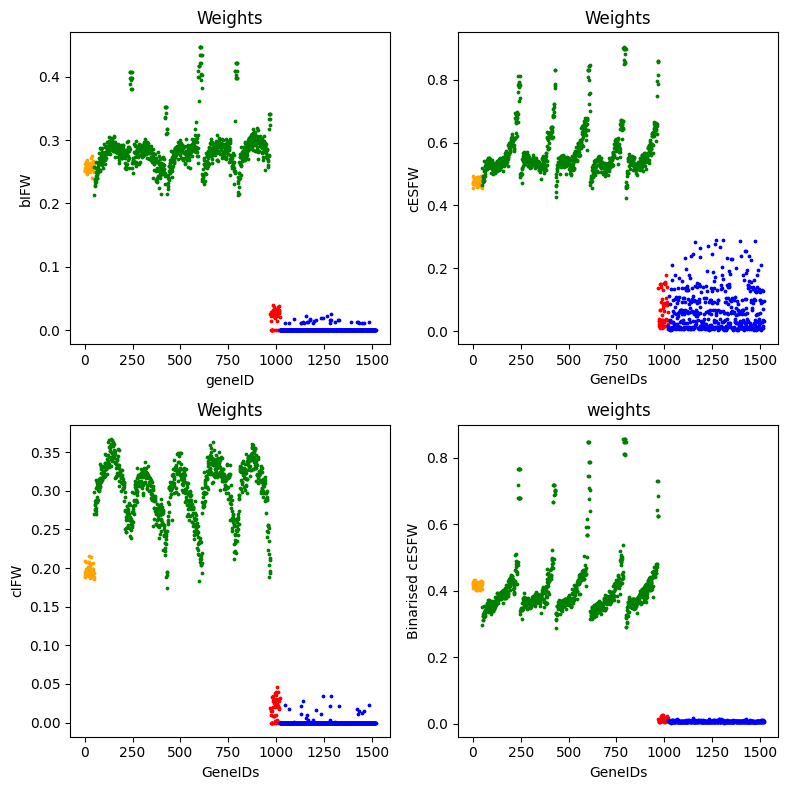

In [109]:
# plot ORDERED
cIFW_w_fetp = cIFW_weights_synthetic_fetp[0]
cIFW_nw_fetp = cIFW_weights_synthetic_fetp[1]
cIFW_w_chip = cIFW_weights_synthetic_chip[0]
cIFW_nw_chip = cIFW_weights_synthetic_chip[1]

bIFW_w_fetp = bIFW_weights_synthetic_fetp[0]
bIFW_nw_fetp = bIFW_weights_synthetic_fetp[1]
bIFW_w_chip = bIFW_weights_synthetic_chip[0]
bIFW_nw_chip = bIFW_weights_synthetic_chip[1]

cESFW_w = cESFW_weights_synthetic[0]
cESFW_nw = cESFW_weights_synthetic[1]
bESFW_w = cESFW_weights_synthetic_binary[0]
bESFW_nw = cESFW_weights_synthetic_binary[1]

x = np.linspace(0, 1, 100)
y = x
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # 1 row, 2 columns
geneIDs = np.arange(1519)

# First scatter plot
axs[0,0].scatter(geneIDs[0:50], np.absolute(bIFW_w_chip[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,0].scatter(geneIDs[50:969], np.absolute(bIFW_w_chip[50:969]), color='green', s = 3, alpha = 1, label = r'Synthetic gene modules')
axs[0,0].scatter(geneIDs[969:1019], np.absolute(bIFW_w_chip[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,0].scatter(geneIDs[1019:1520], np.absolute(bIFW_w_chip[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')


#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[0,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[0,0].set_title('Weights')
axs[0,0].set_xlabel('geneID')
axs[0,0].set_ylabel('bIFW')
#ax1.legend()

# Second scatter plot
axs[0,1].scatter(geneIDs[0:50], np.absolute(cESFW_w[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,1].scatter(geneIDs[50:969], np.absolute(cESFW_w[50:969]), color='green', s = 3, alpha = 1, label = r'Synthetic gene modules')
axs[0,1].scatter(geneIDs[969:1019], np.absolute(cESFW_w[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,1].scatter(geneIDs[1019:1520], np.absolute(cESFW_w[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')
#axs[0,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[0,1].set_title('Weights')
axs[0,1].set_xlabel('GeneIDs')
axs[0,1].set_ylabel('cESFW')
#ax2.legend()

axs[1,0].scatter(geneIDs[0:50], np.absolute(cIFW_w_chip[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,0].scatter(geneIDs[50:969], np.absolute(cIFW_w_chip[50:969]), color='green', s = 3, alpha = 1, label = r'Synthetic gene modules')
axs[1,0].scatter(geneIDs[969:1019], np.absolute(cIFW_w_chip[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,0].scatter(geneIDs[1019:1520], np.absolute(cIFW_w_chip[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')

#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[1,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[1,0].set_title('Weights')
axs[1,0].set_xlabel('GeneIDs')
axs[1,0].set_ylabel('cIFW')
#ax1.legend()

# Second scatter plot
axs[1,1].scatter(geneIDs[0:50], np.absolute(bESFW_w[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,1].scatter(geneIDs[50:969], np.absolute(bESFW_w[50:969]), color='green', s = 3, alpha = 1, label = r'Synthetic gene modules')
axs[1,1].scatter(geneIDs[969:1019], np.absolute(bESFW_w[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,1].scatter(geneIDs[1019:1520], np.absolute(bESFW_w[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')
#axs[0,1].plot(x, y, linestyle='--', color='b', linewidth=2)

#axs[1,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[1,1].set_title('weights')
axs[1,1].set_xlabel('GeneIDs')
axs[1,1].set_ylabel('Binarised cESFW')
#axs.legend()
# Adjust layout to prevent overlap
plt.tight_layout()


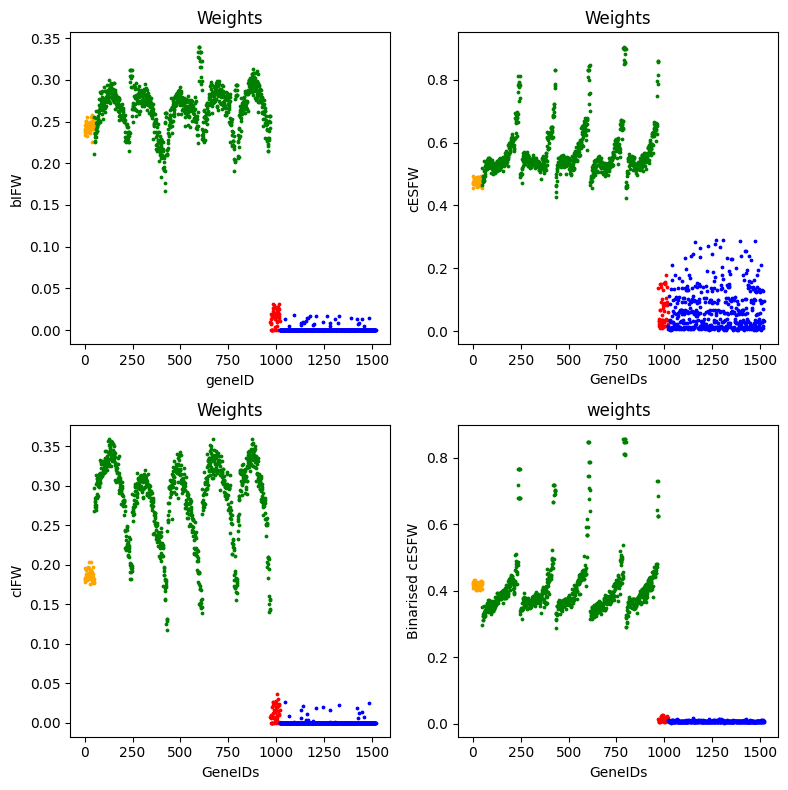

In [114]:
# plot ORDERED
cIFW_w_fetp = cIFW_weights_synthetic_fetp[0]
cIFW_nw_fetp = cIFW_weights_synthetic_fetp[1]
cIFW_w_chip = cIFW_weights_synthetic_chip[0]
cIFW_nw_chip = cIFW_weights_synthetic_chip[1]

bIFW_w_fetp = bIFW_weights_synthetic_fetp[0]
bIFW_nw_fetp = bIFW_weights_synthetic_fetp[1]
bIFW_w_chip = bIFW_weights_synthetic_chip[0]
bIFW_nw_chip = bIFW_weights_synthetic_chip[1]

cESFW_w = cESFW_weights_synthetic[0]
cESFW_nw = cESFW_weights_synthetic[1]
bESFW_w = cESFW_weights_synthetic_binary[0]
bESFW_nw = cESFW_weights_synthetic_binary[1]

x = np.linspace(0, 1, 100)
y = x
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # 1 row, 2 columns
geneIDs = np.arange(1519)

# First scatter plot
axs[0,0].scatter(geneIDs[0:50], np.absolute(bIFW_w_fetp[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,0].scatter(geneIDs[50:969], np.absolute(bIFW_w_fetp[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[0,0].scatter(geneIDs[969:1019], np.absolute(bIFW_w_fetp[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,0].scatter(geneIDs[1019:1520], np.absolute(bIFW_w_fetp[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')


#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[0,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[0,0].set_title('Weights')
axs[0,0].set_xlabel('geneID')
axs[0,0].set_ylabel('bIFW')
#ax1.legend()

# Second scatter plot
axs[0,1].scatter(geneIDs[0:50], np.absolute(cESFW_w[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,1].scatter(geneIDs[50:969], np.absolute(cESFW_w[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[0,1].scatter(geneIDs[969:1019], np.absolute(cESFW_w[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,1].scatter(geneIDs[1019:1520], np.absolute(cESFW_w[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')
#axs[0,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[0,1].set_title('Weights')
axs[0,1].set_xlabel('GeneIDs')
axs[0,1].set_ylabel('cESFW')
#ax2.legend()

axs[1,0].scatter(geneIDs[0:50], np.absolute(cIFW_w_fetp[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,0].scatter(geneIDs[50:969], np.absolute(cIFW_w_fetp[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[1,0].scatter(geneIDs[969:1019], np.absolute(cIFW_w_fetp[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,0].scatter(geneIDs[1019:1520], np.absolute(cIFW_w_fetp[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')

#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[1,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[1,0].set_title('Weights')
axs[1,0].set_xlabel('GeneIDs')
axs[1,0].set_ylabel('cIFW')
#ax1.legend()

# Second scatter plot
axs[1,1].scatter(geneIDs[0:50], np.absolute(bESFW_w[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,1].scatter(geneIDs[50:969], np.absolute(bESFW_w[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[1,1].scatter(geneIDs[969:1019], np.absolute(bESFW_w[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,1].scatter(geneIDs[1019:1520], np.absolute(bESFW_w[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')
#axs[0,1].plot(x, y, linestyle='--', color='b', linewidth=2)

#axs[1,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[1,1].set_title('weights')
axs[1,1].set_xlabel('GeneIDs')
axs[1,1].set_ylabel('Binarised cESFW')
#axs.legend()
# Adjust layout to prevent overlap
plt.tight_layout()


## plot weights scatterplot...

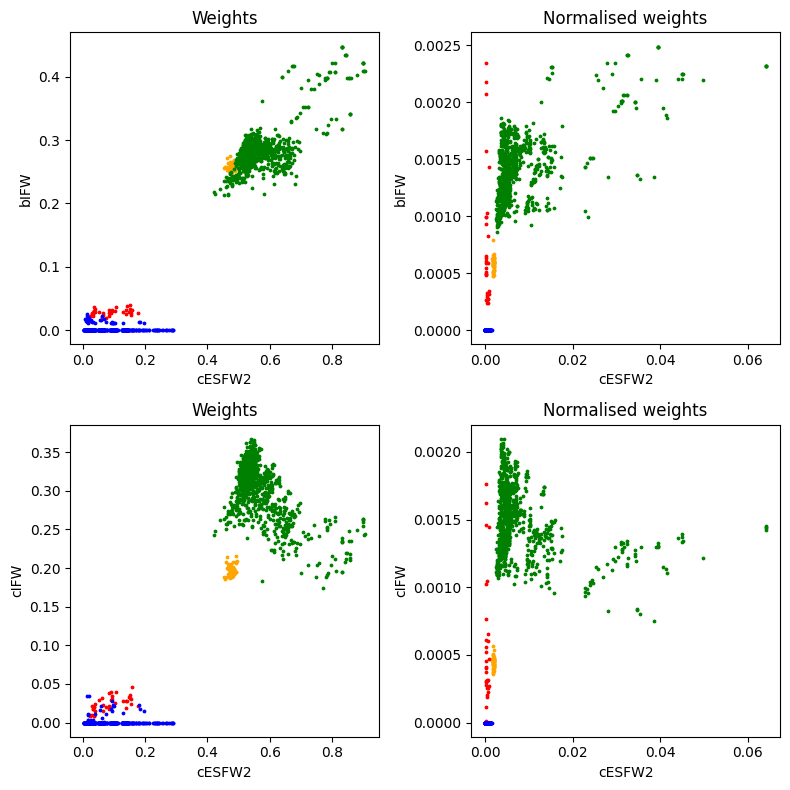

In [115]:
# plot ORDERED
cIFW_w_fetp = cIFW_weights_synthetic_fetp[0]
cIFW_nw_fetp = cIFW_weights_synthetic_fetp[1]
cIFW_w_chip = cIFW_weights_synthetic_chip[0]
cIFW_nw_chip = cIFW_weights_synthetic_chip[1]

bIFW_w_fetp = bIFW_weights_synthetic_fetp[0]
bIFW_nw_fetp = bIFW_weights_synthetic_fetp[1]
bIFW_w_chip = bIFW_weights_synthetic_chip[0]
bIFW_nw_chip = bIFW_weights_synthetic_chip[1]

cESFW_w = cESFW_weights_synthetic[0]
cESFW_nw = cESFW_weights_synthetic[1]

x = np.linspace(0, 1, 100)
y = x
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # 1 row, 2 columns

# First scatter plot
axs[0,0].scatter(np.absolute(cESFW_w[0:50]), np.absolute(bIFW_w_chip[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,0].scatter(np.absolute(cESFW_w[50:969]), np.absolute(bIFW_w_chip[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[0,0].scatter(np.absolute(cESFW_w[969:1019]), np.absolute(bIFW_w_chip[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,0].scatter(np.absolute(cESFW_w[1019:1520]), np.absolute(bIFW_w_chip[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')


#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[0,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[0,0].set_title('Weights')
axs[0,0].set_xlabel('cESFW2')
axs[0,0].set_ylabel('bIFW')
#ax1.legend()

# Second scatter plot
axs[0,1].scatter(np.absolute(cESFW_nw[0:50]), np.absolute(bIFW_nw_chip[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,1].scatter(np.absolute(cESFW_nw[50:969]), np.absolute(bIFW_nw_chip[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[0,1].scatter(np.absolute(cESFW_nw[969:1019]), np.absolute(bIFW_nw_chip[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,1].scatter(np.absolute(cESFW_nw[1019:1520]), np.absolute(bIFW_nw_chip[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')
#axs[0,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[0,1].set_title('Normalised weights')
axs[0,1].set_xlabel('cESFW2')
axs[0,1].set_ylabel('bIFW')
#ax2.legend()

axs[1,0].scatter(np.absolute(cESFW_w[0:50]), np.absolute(cIFW_w_chip[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,0].scatter(np.absolute(cESFW_w[50:969]), np.absolute(cIFW_w_chip[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[1,0].scatter(np.absolute(cESFW_w[969:1019]), np.absolute(cIFW_w_chip[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,0].scatter(np.absolute(cESFW_w[1019:1520]), np.absolute(cIFW_w_chip[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')

#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[1,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[1,0].set_title('Weights')
axs[1,0].set_xlabel('cESFW2')
axs[1,0].set_ylabel('cIFW')
#ax1.legend()

# Second scatter plot

axs[1,1].scatter(np.absolute(cESFW_nw[0:50]), np.absolute(cIFW_nw_chip[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,1].scatter(np.absolute(cESFW_nw[50:969]), np.absolute(cIFW_nw_chip[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[1,1].scatter(np.absolute(cESFW_nw[969:1019]), np.absolute(cIFW_nw_chip[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,1].scatter(np.absolute(cESFW_nw[1019:1520]), np.absolute(cIFW_nw_chip[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')

#axs[1,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[1,1].set_title('Normalised weights')
axs[1,1].set_xlabel('cESFW2')
axs[1,1].set_ylabel('cIFW')
#axs.legend()
# Adjust layout to prevent overlap
plt.tight_layout()


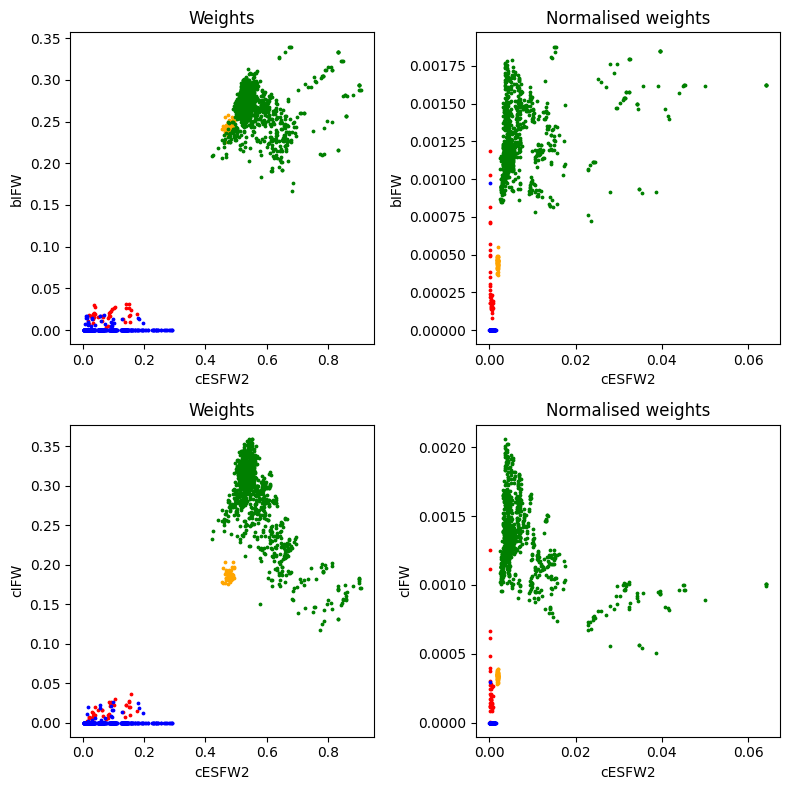

In [116]:
# plot ORDERED with fetp
cIFW_w_fetp = cIFW_weights_synthetic_fetp[0]
cIFW_nw_fetp = cIFW_weights_synthetic_fetp[1]
cIFW_w_chip = cIFW_weights_synthetic_chip[0]
cIFW_nw_chip = cIFW_weights_synthetic_chip[1]

bIFW_w_fetp = bIFW_weights_synthetic_fetp[0]
bIFW_nw_fetp = bIFW_weights_synthetic_fetp[1]
bIFW_w_chip = bIFW_weights_synthetic_chip[0]
bIFW_nw_chip = bIFW_weights_synthetic_chip[1]

cESFW_w = cESFW_weights_synthetic[0]
cESFW_nw = cESFW_weights_synthetic[1]

x = np.linspace(0, 1, 100)
y = x
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # 1 row, 2 columns

# First scatter plot
axs[0,0].scatter(np.absolute(cESFW_w[0:50]), np.absolute(bIFW_w_fetp[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,0].scatter(np.absolute(cESFW_w[50:969]), np.absolute(bIFW_w_fetp[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[0,0].scatter(np.absolute(cESFW_w[969:1019]), np.absolute(bIFW_w_fetp[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,0].scatter(np.absolute(cESFW_w[1019:1520]), np.absolute(bIFW_w_fetp[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')


#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[0,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[0,0].set_title('Weights')
axs[0,0].set_xlabel('cESFW2')
axs[0,0].set_ylabel('bIFW')
#ax1.legend()

# Second scatter plot
axs[0,1].scatter(np.absolute(cESFW_nw[0:50]), np.absolute(bIFW_nw_fetp[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[0,1].scatter(np.absolute(cESFW_nw[50:969]), np.absolute(bIFW_nw_fetp[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[0,1].scatter(np.absolute(cESFW_nw[969:1019]), np.absolute(bIFW_nw_fetp[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[0,1].scatter(np.absolute(cESFW_nw[1019:1520]), np.absolute(bIFW_nw_fetp[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')
#axs[0,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[0,1].set_title('Normalised weights')
axs[0,1].set_xlabel('cESFW2')
axs[0,1].set_ylabel('bIFW')
#ax2.legend()

axs[1,0].scatter(np.absolute(cESFW_w[0:50]), np.absolute(cIFW_w_fetp[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,0].scatter(np.absolute(cESFW_w[50:969]), np.absolute(cIFW_w_fetp[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[1,0].scatter(np.absolute(cESFW_w[969:1019]), np.absolute(cIFW_w_fetp[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,0].scatter(np.absolute(cESFW_w[1019:1520]), np.absolute(cIFW_w_fetp[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')

#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
#axs[1,0].plot(x, y, linestyle='--', color='grey', linewidth=2)
axs[1,0].set_title('Weights')
axs[1,0].set_xlabel('cESFW2')
axs[1,0].set_ylabel('cIFW')
#ax1.legend()

# Second scatter plot

axs[1,1].scatter(np.absolute(cESFW_nw[0:50]), np.absolute(cIFW_nw_fetp[0:50]), color='orange', s = 3, alpha = 1, label = r'Multimodal')
axs[1,1].scatter(np.absolute(cESFW_nw[50:969]), np.absolute(cIFW_nw_fetp[50:969]), color='green', s = 3, alpha = 1, label = r'Ordered gene modules')
axs[1,1].scatter(np.absolute(cESFW_nw[969:1019]), np.absolute(cIFW_nw_fetp[969:1019]), color='red', s = 3, alpha = 1, label = r'Pseudorandom')
axs[1,1].scatter(np.absolute(cESFW_nw[1019:1520]), np.absolute(cIFW_nw_fetp[1019:1520]), color='blue', s = 3, alpha = 1, label = r'Random')

#axs[1,1].plot(x, y, linestyle='--', color='b', linewidth=2)
#ax1.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
#ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
axs[1,1].set_title('Normalised weights')
axs[1,1].set_xlabel('cESFW2')
axs[1,1].set_ylabel('cIFW')
#axs.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
